<h1>Chap11 - Model Evaluation</h1>

Imports

In [98]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split, learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_iris, make_classification, make_regression, make_blobs, load_digits
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, silhouette_score, make_scorer, r2_score, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## 11.1 Cross-Validating Models 

In [2]:
digits = datasets.load_digits()
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(pipeline,
                             features,
                             target, 
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)

In [3]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [4]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.1, random_state=1)

In [5]:
standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [6]:
pipeline = make_pipeline(standardizer, logit)
cv_results = cross_val_score(pipeline,
                             features, 
                             target, 
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)

In [7]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

## 11.2 Creating a Baseline Regression Model 

In [8]:
boston = load_boston()

In [9]:
features, target = boston.data, boston.target
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

-0.001119359203955339

In [10]:
ols = LinearRegression()
ols.fit(features_train, target_train)
ols.score(features_test, target_test)

0.6354638433202116

In [11]:
clf = DummyRegressor(strategy="constant", constant=20)
clf.fit(features_train, target_train)
clf.score(features_test, target_test)

-0.06510502029325727

## 11.3 Creating a Baseline Classification Model 

In [12]:
iris  = load_iris()
features, target = iris.data, iris.target
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
dummy = DummyClassifier(strategy="uniform", random_state=1)
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

0.42105263157894735

In [13]:
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
classifier.score(features_test, target_test)

0.9736842105263158

## 11.4 Evaluating Binary Classifier Predictions 

In [14]:
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

logit = LogisticRegression()
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [15]:
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [16]:
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [17]:
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.1,
                                                    random_state = 1)

y_hat = logit.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_hat)

0.947

## 11.5 Evaluating Binary Classifier Thresholds 

In [30]:
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.1, random_state = 1)
logit = LogisticRegression()
logit.fit(features_train, target_train)
target_probabilities = logit.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

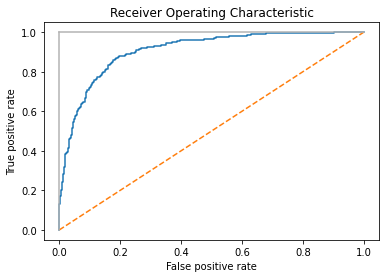

In [26]:
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1 ,1], c=".7")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [27]:
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [28]:
logit.classes_

array([0, 1])

In [42]:
print("Threshold:" , threshold[116])
print("True positive rate:", true_positive_rate[116])
print("False positive rate:", false_positive_rate[116])

Threshold: 0.5331715230155316
True positive rate: 0.810204081632653
False positive rate: 0.14901960784313725


In [36]:
print("Threshold:" , threshold[45])
print("True positive rate:", true_positive_rate[45])
print("False positive rate:", false_positive_rate[45])

Threshold: 0.8189133876659292
True positive rate: 0.5448979591836735
False positive rate: 0.047058823529411764


In [43]:
# area under roc curve
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

## 11.6 Evaluatins Multiclass Classifier Predictions 

In [53]:
features, target = make_classification(n_samples = 10000,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       random_state = 1)

logit = LogisticRegression()
cross_val_score(logit, features, target, scoring="accuracy")

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [45]:
cross_val_score(logit, features, target, scoring="f1_macro")

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In [49]:
target.size

10000

## 11.7 Visualizing a Classifier's Performance 

In [59]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

class_names = iris.target_names
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state = 1)

In [61]:
classifier = LogisticRegression()
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

c:\users\mahel\envs\machinelearningcookbook\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
matrix = confusion_matrix(target_test, target_predicted)

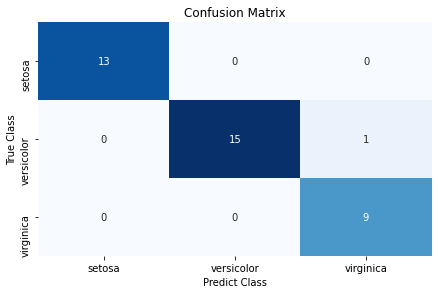

In [70]:
dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predict Class")
plt.show()

## 11.8 Evaluating Regression Models 

In [73]:
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

ols = LinearRegression()

cross_val_score(ols, features, target, scoring="neg_mean_squared_error")

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [74]:
cross_val_score(ols, features, target, scoring="r2")

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

## 11.9 Evaluating Clustering Models 

In [82]:
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

model = KMeans(n_clusters = 2, random_state = 1).fit(features)
target_predicted = model.labels_
silhouette_score(features, target_predicted)

0.8916265564072142

In [80]:
features.size

10000

## 11.10 Creating a Custom Evaluation Metric 

In [84]:
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

In [85]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.1, random_state = 1)

In [86]:
def custom_metric(target_test, target_predicted):
    r2 = r2_score(target_test, target_predicted)
    return r2

In [87]:
score = make_scorer(custom_metric, greater_is_better = True)
classifier = Ridge()
model = classifier.fit(features_train, target_train)
score(model, features_test, target_test)

0.9997906102882058

## 11.11 Visualizing the Effect of Training Set Size

In [92]:
digits = load_digits()
features, target = digits.data, digits.target

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        features,
                                                        target,
                                                        cv=10,
                                                        scoring="accuracy",
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

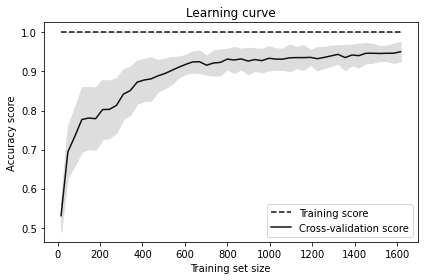

In [93]:
plt.plot(train_sizes, train_mean, '--', color='#111111', label = "Training score")
plt.plot(train_sizes, test_mean, color='#111111', label = "Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning curve")
plt.xlabel("Training set size"), plt.ylabel("Accuracy score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 11.12 Creating a Text Report of Evaluation Metrics

In [97]:
iris = datasets.load_iris()

features = iris.data

target = iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state = 1)

classifier = LogisticRegression()

model = classifier.fit(feature_train, target_train)
target_predicted = model.predict(features_test)

print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



c:\users\mahel\envs\machinelearningcookbook\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 11.13 Visualizing the Effect of Hyperparameter Values 

In [99]:
digits = load_digits()
features, target = digits.data, digits.target

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    target,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="accuracy",
    n_jobs=-1)

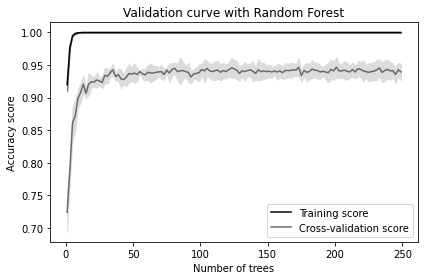

In [101]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, label = "Training score", color="black")
plt.plot(param_range, test_mean, label = "Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")

plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation curve with Random Forest")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()